In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [38]:
data = pd.read_excel('26AprilSD - OH.xlsx')
print("Read the source excel")

Read the source excel


TypeError: 'value' must be an instance of str or bytes, not a int

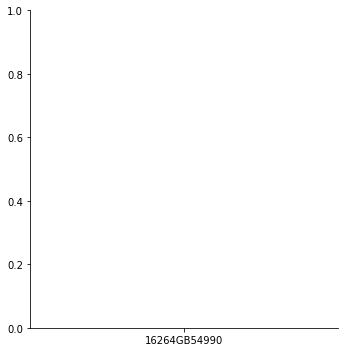

In [39]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data)

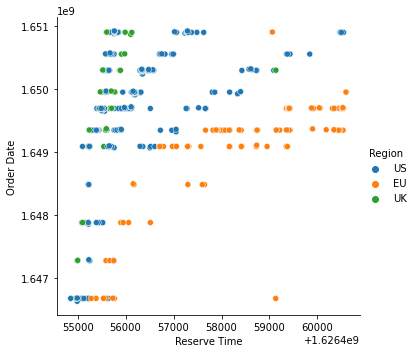

In [32]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Region", data=data)

In [33]:
#data = data[data['Region'] == 'US']
#data

In [34]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [35]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(sparse=False)

OH_cols_data = pd.DataFrame(enc.fit_transform(data[object_cols]))

v_data = data.drop(object_cols, axis=1)

data = pd.concat([ OH_cols_data,v_data], axis=1)

In [36]:
y = data.iloc[:, -1]

X = data.iloc[:, 0:-1]
X

,0,1,2,3,4,Model,Reserve Time
0,0.0,0.0,1.0,1.0,0.0,512,1626454990
1,0.0,0.0,1.0,1.0,0.0,64,1626455638
2,1.0,0.0,0.0,1.0,0.0,64,1626459131
3,0.0,0.0,1.0,1.0,0.0,256,1626455226
4,0.0,1.0,0.0,1.0,0.0,256,1626455184
...,...,...,...,...,...,...,...
534,0.0,0.0,1.0,0.0,1.0,512,1626455765
535,0.0,0.0,1.0,0.0,1.0,512,1626455772
536,0.0,0.0,1.0,0.0,1.0,512,1626455761
537,0.0,0.0,1.0,0.0,1.0,256,1626457291


In [23]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=1)
print("Test Train Split")

Test Train Split


In [24]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [25]:
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

54.16749471163491


In [26]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))


568843.2982292625


In [28]:
#Region	Model	Timestamp	ValveEstimate
d = {'0': 0.0, '1': 0.0,'2':1.0,'3':0.0,'4':0.0,'5':1.0,'6':0.0,'7':1.0, "Reserve Time": 1626469138}
df = pd.DataFrame(data=d, index=[0])

res  = model.predict(df)
print("{0:.0f}".format(res[0]))


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 9)